모델 시각화

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from source import preprocessing, model, submit, evaluate

In [2]:
train_path = '/Users/hj/projects/Aimers/data/raw/train.csv'
preproc = preprocessing.Preprocessor(train_path)
X, y = preproc.fit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 73)

In [3]:
modeler = model.Modeler()
model_path = '/Users/hj/projects/Aimers/models/catboost_model.cbm'
model = modeler.model.load_model(model_path)

In [6]:
model.fit(X_train, y_train, eval_set = (X_train, y_train), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7075496	best: 0.7075496 (0)	total: 281ms	remaining: 4m 40s
1:	test: 0.7225926	best: 0.7225926 (1)	total: 513ms	remaining: 4m 16s
2:	test: 0.7232403	best: 0.7232403 (2)	total: 747ms	remaining: 4m 8s
3:	test: 0.7210405	best: 0.7232403 (2)	total: 1.07s	remaining: 4m 27s
4:	test: 0.7204293	best: 0.7232403 (2)	total: 1.42s	remaining: 4m 41s
5:	test: 0.7230769	best: 0.7232403 (2)	total: 1.76s	remaining: 4m 52s
6:	test: 0.7242279	best: 0.7242279 (6)	total: 2.08s	remaining: 4m 55s
7:	test: 0.7240713	best: 0.7242279 (6)	total: 2.35s	remaining: 4m 51s
8:	test: 0.7238921	best: 0.7242279 (6)	total: 2.65s	remaining: 4m 52s
9:	test: 0.7240452	best: 0.7242279 (6)	total: 2.92s	remaining: 4m 48s
10:	test: 0.7253830	best: 0.7253830 (10)	total: 3.21s	remaining: 4m 48s
11:	test: 0.7263170	best: 0.7263170 (11)	total: 3.52s	remaining: 4m 50s
12:	test: 0.7267162	best: 0.7267162 (12)	total: 3.8s	remaining: 4m 48s
13:	test: 0.7275315	best: 0.7275315 (13)	total: 4.13s	remaining: 4m 50s
14:	test: 0.72

In [8]:
y_pred = model.predict(X_test)


2635

<Axes: >

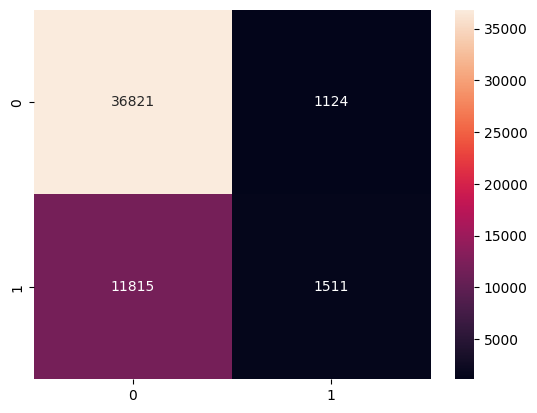

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt='d')

In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     37945
           1       0.57      0.11      0.19     13326

    accuracy                           0.75     51271
   macro avg       0.67      0.54      0.52     51271
weighted avg       0.71      0.75      0.68     51271



In [30]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.7485947871540178

In [25]:
df_result = X_test.copy()
type(df_result)

scipy.sparse._csr.csr_matrix

In [ ]:
feature_importances = model.get_feature_importance(
    test_pool,
    type='FeatureImportance'  # 기본값
)


In [35]:
from catboost import CatBoostClassifier, Pool
test_pool = Pool(X_test, label=y_test)
feature_importances = model.get_feature_importance(test_pool, type='FeatureImportance')
feature_names = preproc.preprocessor.get_feature_names_out()

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) DataFrame 생성 (피처명 + 중요도)
fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# 중요도 순으로 내림차순 정렬
fi_df.sort_values(by='importance', ascending=False, inplace=True)

# 2) 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=fi_df, palette='viridis')
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/var/folders/_7/gw7m14q925731rjlj61v1dqm0000gn/T/ipykernel_76695/2736908178.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi_df, palette='viridis')
/var/folders/_7/gw7m14q925731rjlj61v1dqm0000gn/T/ipykernel_76695/2736908178.py:20: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_7/gw7m14q925731rjlj61v1dqm0000gn/T/ipykernel_76695/2736908178.py:20: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_7/gw7m14q925731rjlj61v1dqm0000gn/T/ipykernel_76695/2736908178.py:20: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_7/gw7m14q925731rjlj61v1dqm0000gn/T/ipykernel_76695/2736908178.py:20: UserWarning

KeyboardInterrupt: 

In [7]:
df_result = X_test.copy()
df_result['y_pred'] = y_pred
df_result['y_test'] = y_test

df_result['correct'] = (df_result['y_pred'] == df_result['y_test']).astype(int)
age_accuarcy = df_result.groupby('시술 당시 나이')['correct'].agg(['count', 'mean'])

NameError: name 'y_pred' is not defined